In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression

# Iris dataset


In [5]:
from sklearn.datasets import load_iris
np.random.seed = 2021
iris = load_iris()
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
#split to train and test
features_names = df_iris[feature_names]
targets = df_iris['label']
X_train, X_test, y_train, y_test = train_test_split(features_names, targets, test_size=0.2, random_state=42)


In [8]:
# scale features
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [9]:
# train KNN classifiers
n_neighbors = 1
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
print ('score train = {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print ('score test = {:.3f}'.format(clf.score(X_test_scaled, y_test)))

score train = 1.000
score test = 1.000


In [13]:
k_best = 1.00
score_best = 1.00
print (f'The best k = {k_best} , score = {score_best}')

The best k = 1.0 , score = 1.0


# Synthetic dataset

<IPython.core.display.Javascript object>


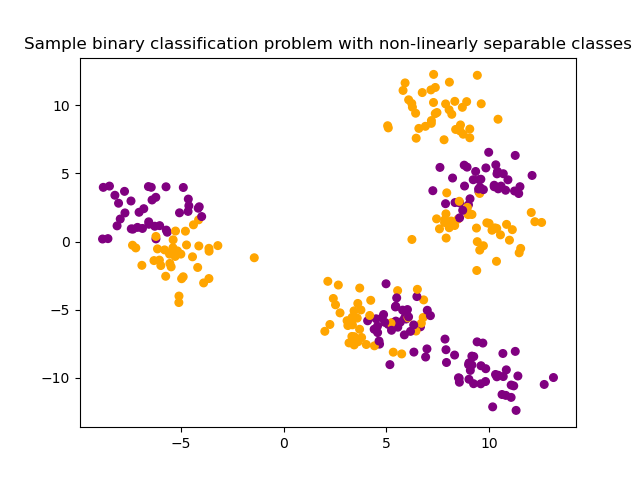

In [16]:
from sklearn.datasets import make_blobs
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['orange','#FFFF00','black','purple'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [18]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.1, random_state=1)

In [19]:
# scale features
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [20]:
# train KNN regressors for different K
n_neighbors = 4
knn_reg = KNeighborsRegressor(n_neighbors).fit(X_train_scaled, y_train)
print ('score train = {:.3f}'.format(knn_reg.score(X_train_scaled, y_train)))
print ('score test = {:.3f}'.format(knn_reg.score(X_test_scaled, y_test)))

score train = 0.811
score test = 0.709


In [21]:
for i in range(1, 10):
    scores_train = []
    scores_test=[]
    X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.1, random_state=i)
    scale = StandardScaler().fit(X_train)
    X_train_scaled = scale.transform(X_train)
    X_test_scaled = scale.transform(X_test)
    k_range = range(1,10)


    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(X_train_scaled, y_train)
        scores_train.append(knn.score(X_train_scaled, y_train))
        scores_test.append(knn.score(X_test_scaled, y_test))
    print(f'k={scores_test.index(max(scores_test)) + 1} --> {scores_train[scores_test.index(max(scores_test))]}, train')
    print(f'k={scores_test.index(max(scores_test)) + 1} --> {max(scores_test)}, test')
    print(f'random -->{i}')
    print('----------')
    scores_train = []
    scores_test=[]

k=7 --> 0.7768670105404799, train
k=7 --> 0.807142857142857, test
random -->1
----------
k=2 --> 0.8703419131771033, train
k=2 --> 0.7963800904977375, test
random -->2
----------
k=4 --> 0.8119957741067998, train
k=4 --> 0.6097285067873301, test
random -->3
----------
k=7 --> 0.7789386321456852, train
k=7 --> 0.6703296703296702, test
random -->4
----------
k=9 --> 0.7805212620027435, train
k=9 --> 0.6674897119341563, test
random -->5
----------
k=4 --> 0.7904532967032967, train
k=4 --> 0.75625, test
random -->6
----------
k=9 --> 0.7775460549183176, train
k=9 --> 0.6832579185520361, test
random -->7
----------
k=5 --> 0.7866549604916593, train
k=5 --> 0.8339285714285715, test
random -->8
----------
k=2 --> 0.8664835164835165, train
k=2 --> 0.7749999999999999, test
random -->9
----------


<IPython.core.display.Javascript object>


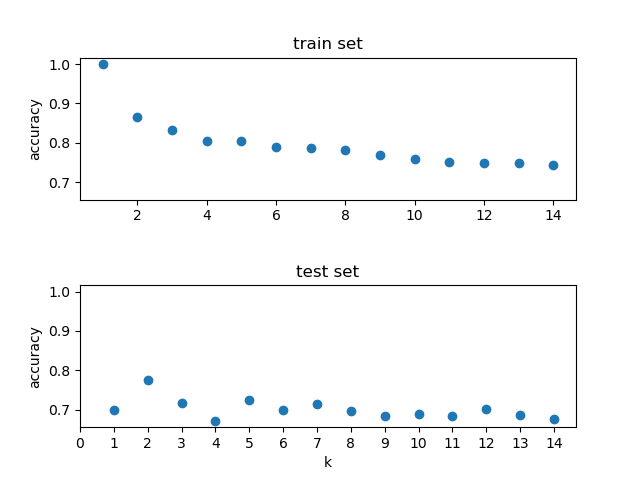

In [23]:
fig, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, sharey=True)
k_range = range(1,15)
scores_train = []
scores_test=[]

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores_train.append(knn.score(X_train_scaled, y_train))
    scores_test.append(knn.score(X_test_scaled, y_test))


plt.sca(ax1)
plt.ylabel('accuracy')

ax1.scatter(k_range, scores_train)


plt.sca(ax2)
plt.xlabel('k')

plt.ylabel('accuracy')
ax2.scatter(k_range, scores_test)
plt.xticks(range(15));
fig.subplots_adjust(hspace=.6)
ax1.set_title('train set');
ax2.set_title('test set');

In [24]:
k_best = n_neighbors
score_best = 0.881
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 4 , score = 0.881
